In [43]:
from matplotlib import  pyplot as plt
from sklearn.cluster import KMeans
import numpy as np
#指定数据集和测试集
from sklearn.datasets import load_digits

X_digits ,y_digits = load_digits(return_X_y=True)

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test  =train_test_split(X_digits,y_digits,random_state=42)

In [44]:
#直接使用逻辑回归
from sklearn.linear_model import LogisticRegression

n_label = 50
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train,y_train)
log_reg.score(X_test,y_test)

d:\code\anaconda\envs\test\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9733333333333334

In [65]:
k = 50
km = KMeans(n_clusters=k,random_state=42)
X_digits_dist = km.fit_transform(X_train)
X_digits_dist.shape#总共50个样本

(1347, 50)

In [59]:
X_represent_digits_idx=np.argmin(X_digits_dist,axis=0)#输出每列最小值的行号
X_represent_digits=X_train[represent_digits_idx]#也就是说取出最有代表性的样本
X_represent_digits.shape

(50, 64)

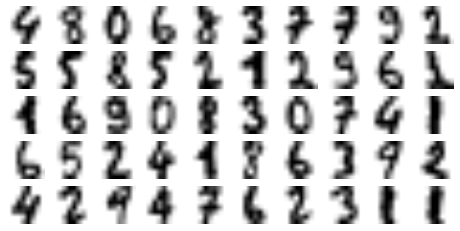

In [64]:
plt.figure(figsize=(8,4))
for index,X_representative_digit in enumerate(X_represent_digits):
    plt.subplot(k//10,10,index+1)
    plt.imshow(X_representative_digit.reshape(8,8),cmap='binary',interpolation='bilinear')
    plt.axis('off')
plt.show()

In [66]:
y_represent_digits = np.array(
    [
        4,8,0,6,8,3,7,7,9,2,
        5,5,8,5,2,1,2,9,6,1,
        1,6,9,0,8,3,0,7,4,1,
        6,5,2,4,1,8,6,3,9,2,
        4,2,9,4,7,6,2,3,1,1
    ]
)


In [70]:
#再使用逻辑回归  使用精准的数据效果更好
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_represent_digits,y_represent_digits)
log_reg.score(X_test,y_test)#效果明显更好

d:\code\anaconda\envs\test\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.92

In [75]:
y_train_propagated = np.empty(len(X_train),dtype=np.int32)
for i in range(k):
    y_train_propagated[km.labels_==i] = y_represent_digits[i] #按之前找到的类型，按蔟给出标签，实现样本的扩大这就是标签传播

log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train,y_train_propagated)
log_reg.score(X_test,y_test)

d:\code\anaconda\envs\test\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9288888888888889

In [81]:
X_cluster_dist.shape

(1347,)

In [84]:
percentile_closest = 20
X_cluster_dist = X_digits_dist[np.arange(len(X_train)),km.labels_]
# 1347,0 也就是1357到自己蔟质心的距离
for i in range(k):
    in_cluster = (km.labels_==i)
    cluster_dist = X_cluster_dist[in_cluster]# 选择相应的蔟
    cutoff_distense = np.percentile(cluster_dist,percentile_closest)#找到前20%的距离
    above_cutoff = (X_cluster_dist > cutoff_distense)
    X_cluster_dist[in_cluster & above_cutoff] = -1

In [86]:
partially_propagated = (X_cluster_dist != -1)
X_train_partially_propagated = X_train[partially_propagated]
y_train_partially_propagated = y_train[partially_propagated]

In [87]:
log_reg= LogisticRegression(random_state=42)
log_reg.fit(X_train_partially_propagated,y_train_partially_propagated)
log_reg.score(X_test,y_test)#0.9488888888888889

d:\code\anaconda\envs\test\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9488888888888889